# Template for running CP-TPP model

In [4]:
import os
import pandas as pd 
import numpy as np
from matplotlib_venn import venn2

#Importing CP-TPP functions
import cp.cp as c
import tpp.tpp as tpp

#Keep when developing a function
from importlib import reload

ModuleNotFoundError: No module named 'cp'

You can get documentation for each function in the module cp_tpp_model by typing help(c.[name of function]) or help(tpp.[name of function]), e.g. help(c.process_cp_to_median)

In [3]:

help(tpp.findLargestBetweennessCentrality)

Help on function findLargestBetweennessCentrality in module tpp.tpp:

findLargestBetweennessCentrality(between_c, protein_list, removeList=False, output_size=5, cluster_index=0)
    Find proteins with largest betweenness centrality from network.
    
    Takes a dictionary (between_c) of betweenness centrality scores
    as input and returnes the top N proteins with highest scores
    as defined by "output_size". 
    
    If removeList = True, the function first removes all proteins from
    protein_list. This is used in combination with consensus clustering
    when plotting a PPI network for all proteins identified in TPP as well
    as the most central proteins identified in CP. 
    
    Parameters
    ----------
    between_c: dict
       Betweenness centrality for network. Proteins as 
       keys and betweenness centrality scores as values.
    
    protein_list: list
       List of significant proteins from TPP data.
    
    removeList: bool
       If True, proteins in protei

## Cell Painting data

### Importing and processing Cell Painting data for downstream analysis
The imported cell painting data has already been normalised and processed into Z-scores per image. The SPECs data was run over two experiments: SPECS 2k and SPECS 3k. These needs to be merged to generate the complete data set. 

After merging the two data sets, metadata and compound information is added to the file and features are summarised into median z-scores per well rather than per image, which reduces the size of the file. 

In [3]:
#Importing cell painting data for SPECS project
#Importing SPECS 2k data
df2k =  pd.read_parquet('/share/data/analyses/maris/specs2k/ImageMeanFeaturesNormalized/specs2k_dfZscoresNormalizedPerPlateWithDMSOMedianMAD.parquet')
df2k['project'] = 'specs2k'

#Importing SPECS 3k data
df3k =  pd.read_parquet('/share/data/analyses/maris/specs3k_uncroped/ImageMeanFeaturesNormalized/specs3k_dfZscoresNormalizedPerPlateWithDMSOMedianMAD.parquet')
df3k['project'] = 'specs3k'

#Merge
dfAll = pd.concat([df2k, df3k], ignore_index = True, copy=True)
dfAll.dropna(inplace=True, axis=1)

# Import flags
QC =  pd.read_csv('/share/data/analyses/martin/024_specs_all/QC_SpecsAll_2K_3K_plots/Flags.csv', sep=';', index_col=[0])

# Merge flags with dfAll
df = dfAll.merge(QC, left_on = ['Metadata_Barcode', 'Metadata_Well',  'Metadata_Site'],
                 right_on = ['Metadata_Barcode', 'Metadata_Well',  'Metadata_Site'], how = 'left')

df = df[df['Total'] == 0 ]
df  = df[df['Count_nuclei'] >= 20] # optional: drop images that have less than e.g. 20 cells
df.drop(columns = 'Total', inplace=True)


# Process and summarise data to median z-scores
dfGroupedByPlate1 = c.process_cp_to_median(df, file_name='/share/data/analyses/camilla/cp_tpp/processed_data/median_processed_specs_all.parquet')

# Import annotations
annotations = pd.read_csv('/share/data/analyses/martin/024_specs_all/annotations.csv', sep=';', encoding='unicode_escape')

# Add compound annotations
# dfGroupedByPlate1 = dfGroupedByPlate1.merge(annotations, left_on='batch_id', right_on = 'Batch nr', how='left')


In [4]:
dfGroupedByPlate1.head()

,Count_nuclei,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,AreaShape_Center_X_nuclei,AreaShape_Center_Y_nuclei,AreaShape_Compactness_nuclei,...,cmpd_conc,ImageQuality_MeanIntensity_HOECHST,ImageQuality_MeanIntensity_MITO,ImageQuality_MeanIntensity_PHAandWGA,ImageQuality_MeanIntensity_SYTO,ImageQuality_MedianIntensity_CONC,batch_id,cbkid,Metadata_Barcode,project
0,279.5,0.152467,0.315815,0.551839,-0.128661,0.538979,-0.105070,0.543602,-0.116165,0.104729,...,10.0,0.035915,0.096324,0.092770,0.031289,0.043336,BJ1894240,CBK000155,P101369,specs3k
1,239.0,0.187259,0.645446,-0.329470,0.033979,-0.317904,0.036842,-0.323929,0.036642,0.990625,...,10.0,0.032455,0.096063,0.084835,0.033469,0.022950,BJ1894240,CBK000155,P101368,specs3k
2,147.0,-0.438304,-0.725424,0.516265,-0.692983,0.548414,-0.694865,0.535324,-0.692454,1.447833,...,10.0,0.050379,0.128740,0.150275,0.056225,0.027344,BJ1894337,CBK000156,P103602,specs2k
3,159.0,0.346499,0.003773,0.914459,0.602903,0.915872,0.659019,0.919636,0.635690,-0.556398,...,10.0,0.052737,0.124666,0.160129,0.067318,0.027832,BJ1894337,CBK000156,P103601,specs2k
4,168.0,0.649833,0.590539,-0.607761,-0.333192,-0.611260,-0.335409,-0.609274,-0.335213,0.551538,...,10.0,0.059684,0.122136,0.168836,0.075757,0.048585,BJ1894320,CBK000161,P103614,specs2k


### Plot UMAP for all compounds of interest along with controls
**The control compounds were the following:** 

berb = Berberine Chloride (CAS: 633-65-8)

sorb = Sorbitol (CAS: 50-70-4)

etop = Etoposide (CAS: 33419-42-0)

fenb = Fenbendazole (CAS: 43210-67-9)

ca-0 = Ca-074 Me (CAS: 147859-80-1)

flup = Fluphenazine Dihydrochloride (CAS: 146-56-5)

tetr = Tetrandrine | Fanchinine (CAS: 518-34-3)

In [2]:
#Read in processed data (if you have already run the previous step once)
dfGroupedByPlate1 =  pd.read_parquet('/share/data/analyses/camilla/cp_tpp/processed_data/median_processed_specs_all.parquet')

# Import annotations
annotations = pd.read_csv('/share/data/analyses/martin/024_specs_all/annotations.csv', sep=';', encoding='unicode_escape')

In [3]:
#Map compound codes to names
CompoundNames = {'CBK278083': 'I-BET151', 'CBK278065': '(+)-JQ1'
                }

ControlNames = {'[berb]': '[berb]', '[sorb]': '[sorb]', '[etop]': '[etop]', '[fenb]': '[fenb]', 
                 '[ca-0]': '[ca-0]', '[flup]': '[flup]' , '[tetr]': '[tetr]'
               }

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


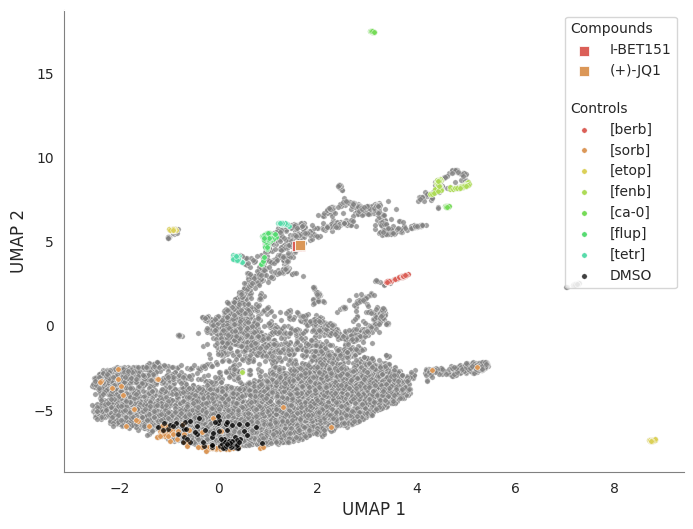

In [4]:
#Plot UMAP
c.umap_compounds(dfGroupedByPlate1, annotations, CompoundNames, ControlNames, file_name='/share/data/analyses/camilla/cp_tpp/figures/figures_from_template/umap_IBET151_JQ1.tiff')

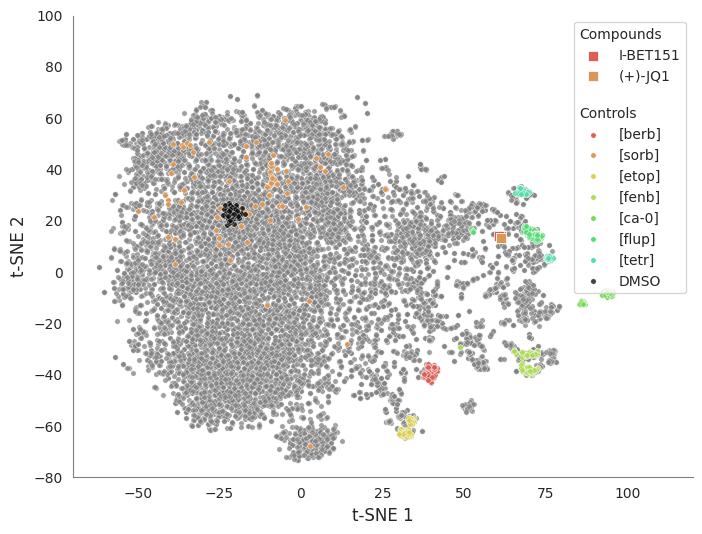

In [8]:
reload(c)
c.tsne_compounds(dfGroupedByPlate1, annotations, CompoundNames, ControlNames, file_name='/share/data/analyses/camilla/cp_tpp/figures/figures_from_template/tsne_IBET151_JQ1.tiff')

### Cluster CP data using SC3s and plot smallest clusters for each compound
The cell painting (CP) data is clustered using the unsupervised clustering Python package SC3, Single Cell Consensus
Clustering with speed [[1](https://doi.org/10.1186/s12859-022-05085-z)]. SC3s was originally developed for clustering single cell RNA sequencing data, and builds on a consensus clustering algorithm wrapped around *k*-means clustering. 

1. Features are first reduced using principal component analysis to 14 principal components
2. SC3s is run on the 14 components using five different *k* number of clusters (k = 100, 110, 120, 150, 180) at 2000 repeated runs for each value of *k* using a batch size of 2000.
3. For each investigated *k*, the cluster containing the compound of interest is identified and the cluster sizes ranked. The smallest cluster for all considered values of *k*, containing at least 20 compounds, is selected.
4. The selected cluster can be visualized using either UMAP or t-SNE.

In [ ]:
#Calculate consensus clustering
clusters_compounds = c.cluster_compound_sc3s(dfGroupedByPlate1, 
                                             CompoundNames, 
                                             batch_size = 2000,
                                             d_range = 14,
                                             n_runs = 2000,
                                             file_name='/share/data/analyses/camilla/cp_tpp/processed_data/pca_specs_all_withClusters_2000runs1.parquet'
                                            )

/usr/local/lib/python3.10/dist-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
INFO:root:multiplier_facility not set, using default value of 3...
INFO:root:number of facilities calculated as 540


Clustering with SC3s...


INFO:root:original binary matrix shape: (10941, 80000)
INFO:root:original binary matrix shape: (10941, 88000)
INFO:root:original binary matrix shape: (10941, 96000)


In [4]:
#Import previous concensus clustering
#Read in consensus clusters if the cell above has already been run
reload(c)

principalDf_conc = pd.read_parquet('/share/data/analyses/camilla/cp_tpp/processed_data/pca_specs_all_withClusters_2000runs1.parquet')
n_clusters = [100, 110, 120, 150, 180]

#Reset index
CompoundNames2 = {'I-BET151': 'CBK278083', '(+)-JQ1': 'CBK278065'
                }

principalDf_conc['cbkid'] = principalDf_conc['cbkid'].replace(CompoundNames2)
principalDf_conc.sort_values(by = ['cbkid'], inplace = True)
principalDf_conc.reset_index(inplace=True, drop=True)
principalDf_conc['cbkid'] = principalDf_conc['cbkid'].replace(CompoundNames)

#Find cluster for each compound
clusters_compounds = {i:[] for i in CompoundNames.values()}
for i in CompoundNames.values():
    clusters_compounds[i] = c.find_cluster(principalDf_conc, n_clusters, i)

For compound I-BET151
Cluster sc3s_100 is 86 long.
Cluster sc3s_110 is 41 long.
Cluster sc3s_120 is 43 long.
Cluster sc3s_150 is 43 long.
Cluster sc3s_180 is 71 long.
Smallest cluster sc3s_110 with length 41
For compound (+)-JQ1
Cluster sc3s_100 is 86 long.
Cluster sc3s_110 is 41 long.
Cluster sc3s_120 is 43 long.
Cluster sc3s_150 is 43 long.
Cluster sc3s_180 is 314 long.
Smallest cluster sc3s_110 with length 41


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


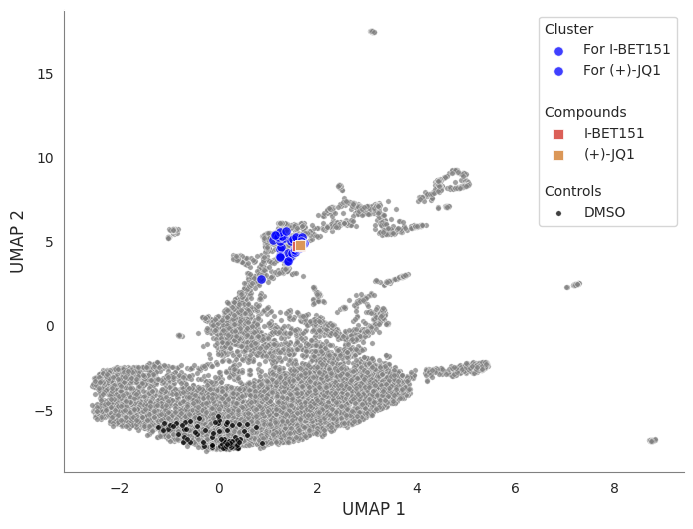

In [6]:
#Plot UMAP for identified clusters
c.umap_compounds(dfGroupedByPlate1, annotations, CompoundNames, ControlNames=None, Cluster=clusters_compounds, file_name='/share/data/analyses/camilla/cp_tpp/figures/figures_from_template/umap_withClusters_IBET151_JQ1_v2.tiff')

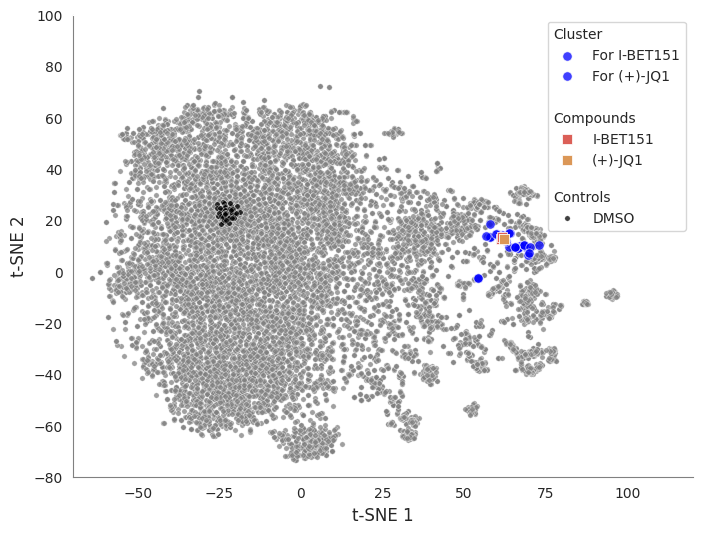

In [9]:
#Plot t-SNE for identified clusters
c.tsne_compounds(dfGroupedByPlate1, annotations, CompoundNames, ControlNames=None, Cluster=clusters_compounds, file_name='/share/data/analyses/camilla/cp_tpp/figures/figures_from_template/tsne_withClusters_IBET151_JQ1_v2.tiff')

### Radar charts and feature similarity maps for compounds
The Cell Profiler extracted feature z-scores in the CP data are summarized into subcellular locations. Features are grouped into categories based on two criteria: (i) Cell Profiler module, i.e. Intensity (I), Correlation (C), Granularity (G), Location (L) and RadialDistribution (RD); and (ii) stains, i.e. Nucleus (Hoechst), ER (Concanavalin A), Nucleoli and cytoplasmic RNA (SYTO14), Golgi apparatus and F-actin cytoskeleton (WGA and Phalloidin) and Mitochondria (Mitotracker). Features are only consider for the object Cell, except for features from the stain for Nucleus, which are only considered in the object Nucleus. 

Additionally, area-shape related features are grouped by cell compartment, i.e. Cell (C), Cytoplasm (Cy) and Nucleus (N). The median z-score in each category are plotted as radar charts indicating a positive or negative change in z-score for each category.

In [22]:
#Read in processed data (if you have already run the previous step once)
dfGroupedByPlate1 =  pd.read_parquet('/share/data/analyses/camilla/cp_tpp/processed_data/median_processed_specs_all.parquet')

# Import annotations
annotations = pd.read_csv('/share/data/analyses/martin/024_specs_all/annotations.csv', sep=';', encoding='unicode_escape')

I-BET151
Radar Chart saved as:
/share/data/analyses/camilla/cp_tpp/figures/figures_from_template/radar_chart_I-BET151.svg


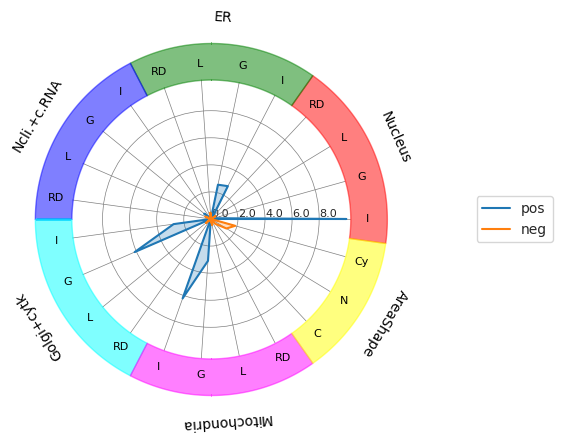

(+)-JQ1
Radar Chart saved as:
/share/data/analyses/camilla/cp_tpp/figures/figures_from_template/radar_chart_(+)-JQ1.svg


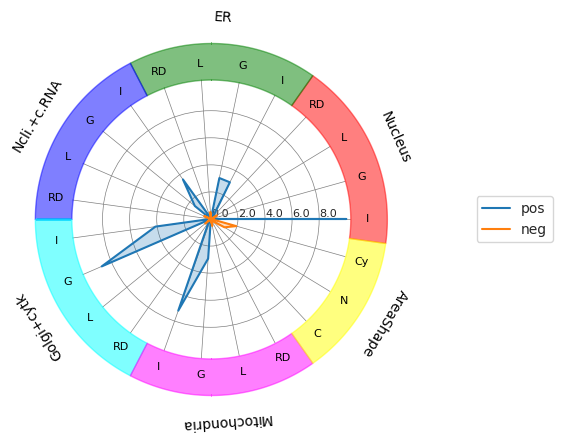

In [7]:
#Prepare data for plotting radar charts
dfRadar = c.processDataForRadar(dfGroupedByPlate1, CompoundNames)

#Plot radar charts
for compound in CompoundNames.values():
    print(compound)
    file_name = '/share/data/analyses/camilla/cp_tpp/figures/figures_from_template/radar_chart_' + compound + '.svg'
    c.plotRadar(dfRadar, compound, file_name=file_name)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


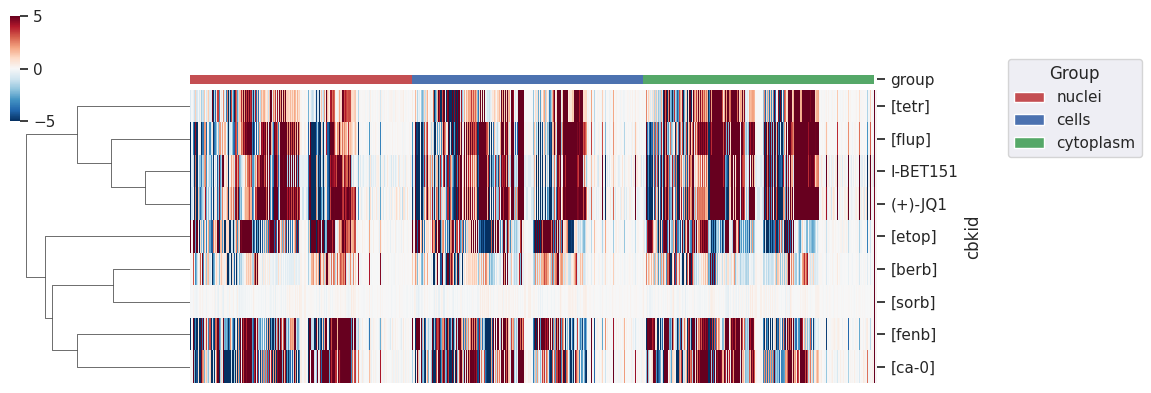

In [8]:
#Plot feature heatmap
c.plotFeatureHeatmap(dfGroupedByPlate1, CompoundNames, ControlNames, file_name=None)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


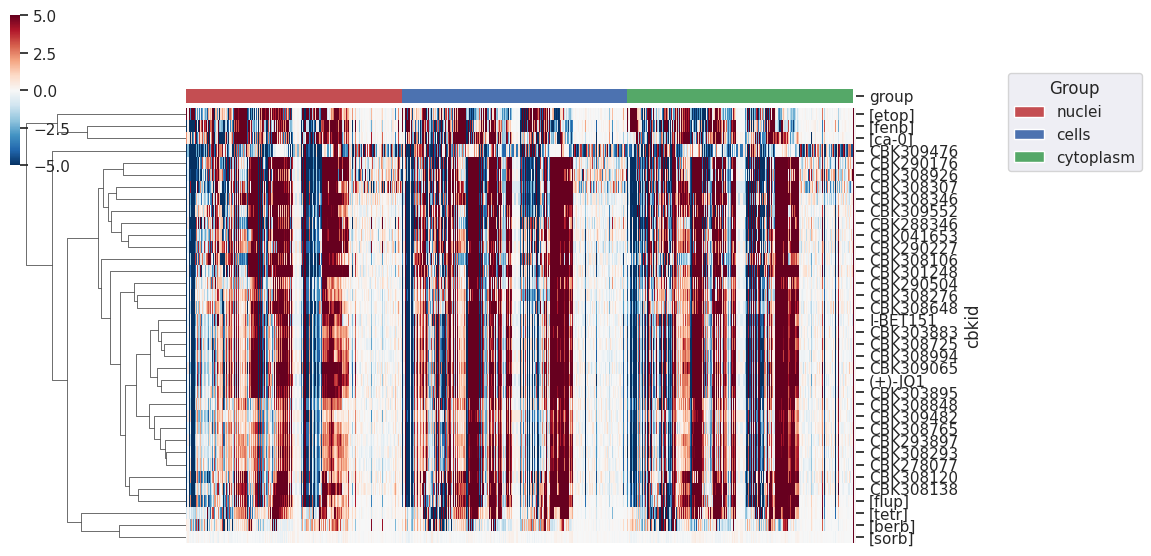

In [9]:
#Plot feature heatmap which includes compounds from SC3s clusters. 
c.plotFeatureHeatmap(dfGroupedByPlate1, CompoundNames, ControlNames, file_name=None, Cluster=clusters_compounds, height=5)

### Plot prevalence of compound targets in CP data
For the compounds of interest, plots how likely they are to map morphologically to other compounds targeting the same proteins. The approach in our model is built on the assumption that compounds will cluster closely to other compounds sharing similar targets. 

In [15]:
reload(c)
#Extract targets for compounds of interest
targets_ibet151 = c.findTargetsForCompound(dfGroupedByPlate1, annotations, 'CBK278083')
targets_jq1 = c.findTargetsForCompound(dfGroupedByPlate1, annotations, 'CBK278065')
targets_jq1_ibet151 = targets_jq1 + targets_ibet151


In [16]:
#For all compounds in CP data, create a list of indices where compounds target any of these proteins. 
reload(c)
cluster_targets_jq1_ibet151 = c.findClusterForCompoundTargets(dfGroupedByPlate1, annotations, targets_jq1_ibet151)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


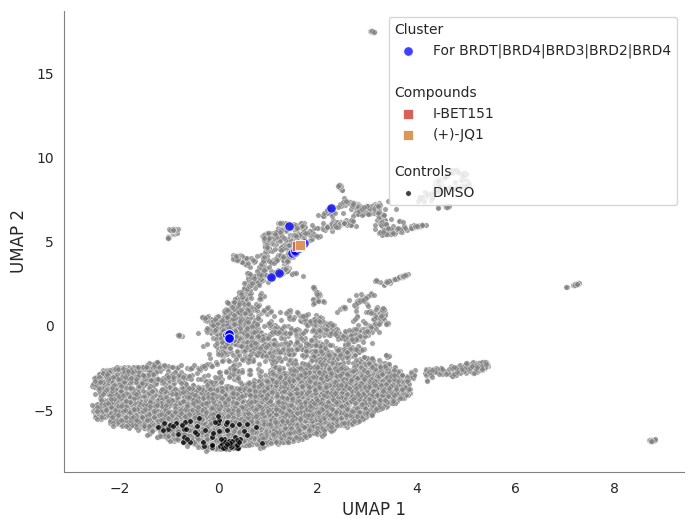

In [17]:
#Plot clusters in UMAP.
cluster_targets_jq1_ibet151_dict = {"|".join(targets_jq1_ibet151):cluster_targets_jq1_ibet151}

c.umap_compounds(dfGroupedByPlate1, 
                 annotations, 
                 CompoundNames, 
                 ControlNames=None, 
                 Cluster=cluster_targets_jq1_ibet151_dict, 
                 file_name='/share/data/analyses/camilla/cp_tpp/figures/figures_from_template/umap_compoundsWithSharedTargets_IBET151_JQ1.tiff'
                )

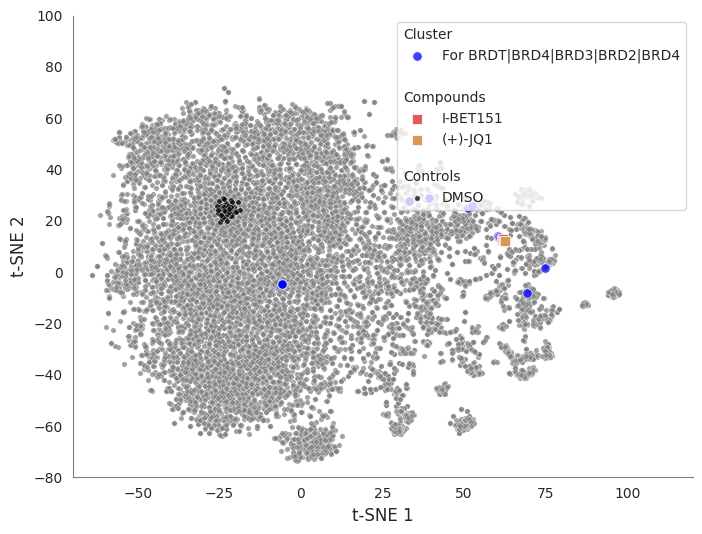

In [18]:
c.tsne_compounds(dfGroupedByPlate1, 
                 annotations, 
                 CompoundNames, 
                 ControlNames=None, 
                 Cluster=cluster_targets_jq1_ibet151_dict, 
                 file_name='/share/data/analyses/camilla/cp_tpp/figures/figures_from_template/tsne_compoundsWithSharedTargets_IBET151_JQ1.tiff'
                )

## Thermal proteome profiling data

Thermal Proteome Profiling (TPP) should first be processed in R using the TPP library. https://www.bioconductor.org/packages/release/bioc/html/TPP.html 

Depending on the type of TPP experiment, different pre-processing functions are used, and this affects the appearance of the results table generated by the R function. Use the following functions from the TPP package depending on your data type: 

* TPP-TR: function "analyzeTPPTR". https://www.bioconductor.org/packages/release/bioc/vignettes/TPP/inst/doc/TPP_introduction_1D.pdf
* 2D-TPP: function "analyze2DTPP". https://www.bioconductor.org/packages/release/bioc/vignettes/TPP/inst/doc/TPP_introduction_2D.pdf

In both cases, data is assumed to contain TMT labels and you will need to create a "configTable" and "data" file with a few very specific columns for the functions to work. This is all very well described in the documentation linked above. 

The results generated with these functions include an excel file with all processed and normalised intensities and statistical test results. We will use these result files as input to this python model. 

### Extract significantly affected proteins from TPP data

In [464]:
#Run this code if you have TPP-TR data. 
reload(tpp)

proteins_all_rosc, proteins_stab_rosc, proteins_destab_rosc = tpp.extractSignifTargetsTPPTR("/share/data/analyses/camilla/cp_tpp/figures/results_TPP_TR.xlsx", sheet_name=0, header=0)
#tpp.extractSignifTargetsTPPTR("/share/data/analyses/camilla/cp_tpp/figures/results_TPP_TR.xlsx", sheet_name=0, header=0, max_fdr=1)

In [5]:
#Run this code if you have 2D-TPP data.
reload(tpp)
proteins_all_jq1, proteins_stab_jq1, proteins_destab_jq1 = tpp.extractSignifTargets2DTPP("/share/data/analyses/camilla/cp_tpp/processed_data/Supplementary Dataset 2_2D-TPP.xlsx")

proteins_all_jq1_ce, proteins_stab_jq1_ce, proteins_destab_jq1_ce = tpp.extractSignifTargets2DTPP("/share/data/analyses/camilla/cp_tpp/processed_data/Supplementary Dataset 2_2D-TPP.xlsx", sheet_name=2)

proteins_all_ibet151, proteins_stab_ibet151, proteins_destab_ibet151 = tpp.extractSignifTargets2DTPP("/share/data/analyses/camilla/cp_tpp/processed_data/Supplementary Dataset 2_2D-TPP.xlsx", sheet_name=3)

The dictionary "external_data" contain paths for files used when labelling nodes in a PPI network. Right now, the "num temp curves" and "other TPP data" only applies to 2D-TPP data where the results file has been generated with the analyze2DTPP function from the R-package TPP. If the TPP data has been analyzed in any other way or is not 2D-TPP, these keys can be removed from the dictionary. The key "direction" only applies to 2D-TPP and TR-TPP data generated with the analyzeTPPTR or analyze2DTPP function from the R-package TPP. If the TPP data has been analyzed in any other way, this key can be removed from the dictionary.

In [6]:
#Import external subcellular location data from Human Protein Atlas
feature_df = pd.read_csv("/share/data/analyses/camilla/cp_tpp/raw_data/subcellular_location.tsv", sep="\t")

#Import external cell line expression data from Human Protein Atlas
exp_df = pd.read_csv("/share/data/analyses/camilla/cp_tpp/raw_data/rna_celline.tsv", sep="\t")
exp_df = exp_df[exp_df["Cell line"] == "U2OS"]

#Define location of external data files needed for plotting. 
external_data = {"subcellular": ["/share/data/analyses/camilla/cp_tpp/raw_data/subcellular_location.tsv"],
                 "cell line": ["/share/data/analyses/camilla/cp_tpp/raw_data/rna_celline.tsv"],
                 "num temp curves": ["/share/data/analyses/camilla/cp_tpp/processed_data/Supplementary Dataset 2_2D-TPP.xlsx", 
                                     {"sheet_name":1, "header":1}],
                 "direction": ["/share/data/analyses/camilla/cp_tpp/processed_data/Supplementary Dataset 2_2D-TPP.xlsx", 
                                     {"sheet_name":1, "header":1}],
                 "other TPP data": ["/share/data/analyses/camilla/cp_tpp/processed_data/Supplementary Dataset 2_2D-TPP.xlsx", 
                                     {"sheet_name":2, "header":1}, {"cutoff": 2}]
                }

### Plot subcellular extression histogram

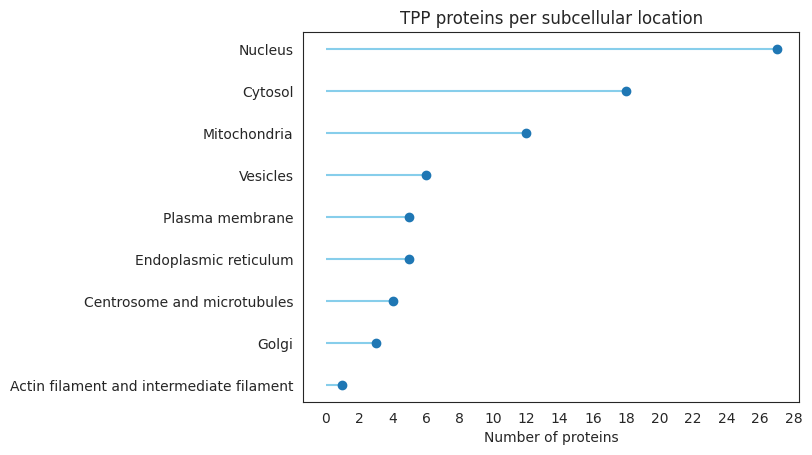

In [7]:
reload(c)
tpp.make_sl_histogram(proteins_all_jq1, feature_df)

### Plot PPI network with targets from TPP
Each network is generated in two steps: 
1. A preliminary network is retrieved from STRING and plotted using the tpp.retrievePreliminaryNetwork() function. The function outputs G and interactions.
2. A final, formatted network is plotted using the tpp.plotPPINetwork() function, where G and interactions are taken as inputs. If the network in step 1 contained more than one disconnected subnetwork (subnetworks which are not connected with any edges), then the variable "community" should be updated to reflect the number of disconnected subnetworks. This will allow to plot each subnetwork as a separate graph.

The variable "label_method" determines how the nodes will be labelled/colored and can take one of six different inputs: 
* **"subcellular"**: Subcellular expression from Human protein atlas data. Based on file path in key "subcellular" from dictionary "external_data".
* **"cell line"**: RNA expression (from Human protein atlas data) from cell line specified in variable "celline". Based on file path in key "cell line" from dictionary "external_data".
* **"num temp curves"**: Number of neighboring temperature curves in 2D-TPP data based on dataset specified in key "num temp curves" from dictionary "external_data". Only works for 2D-TPP data. 
* **"direction"**: Labels nodes as stabilized or destabilized based on dataset specified in key "direction" in "external_data". Only works for 2D-TPP and TR-TPP generated using the TPP R-package. 
* **"other TPP data"**: Labels nodes as stabilized or destabilized based on dataset specified in key "other TPP data" from dictionary "external_data". Only works for 2D-TPP data. Can be used to show overlap in nodes between two TPP datasets. 
* **"cluster count"**: Labels nodes based on number of times a protein is detected in CP cluster. Requires variable "cluster_count_df" to not be None. 

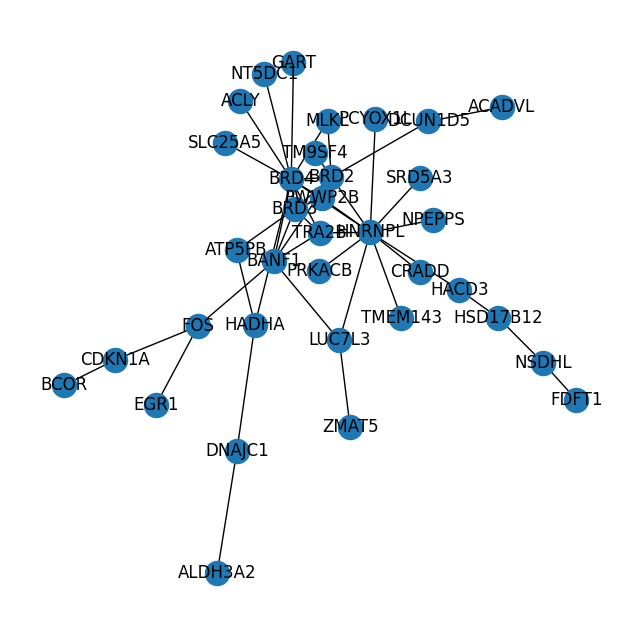

In [8]:
#Plot preliminary network
reload(c)
G_prel, interactions = tpp.retrievePreliminaryNetwork(proteins_all_jq1, network_type="physical")

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin' will be ignored
  node_collection = ax.scatter(


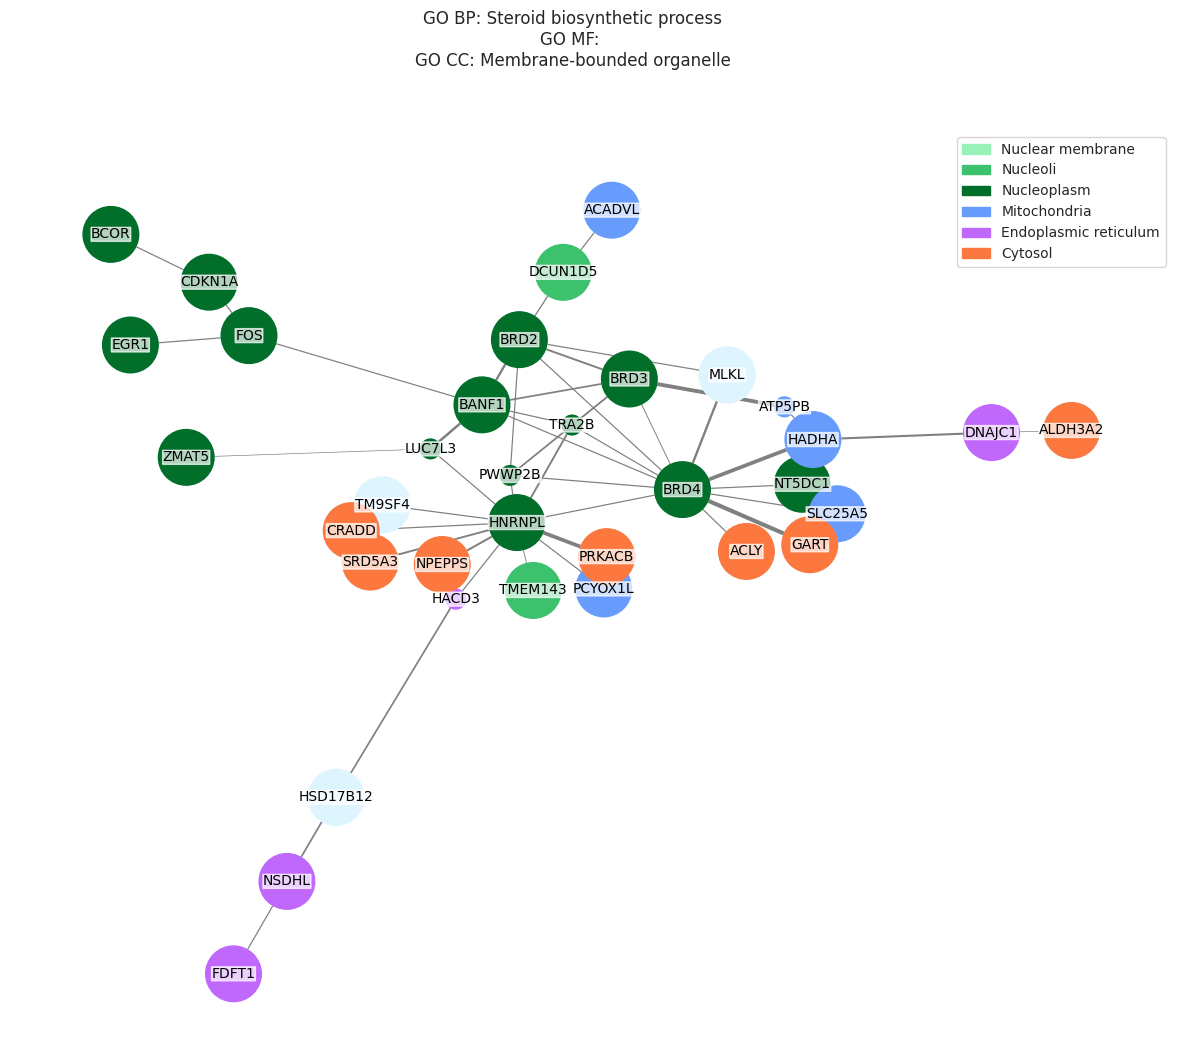

In [9]:
#Plot physical network 
reload(tpp)
between_c = tpp.plotPPINetwork(G_prel, 
                             interactions, 
                             community=1, #Number of separate (not connected) networks seen in preliminary network figure above.
                             protein_list=proteins_all_jq1,
                             external_data=external_data,
                             #file_name='/share/data/analyses/camilla/cp_tpp/figures/figures_from_template/ppi_network_jq1_subcellular_wc_physical_v2.svg',
                             label_method="subcellular",
                             celline = "THP-1",
                             figure_size=(15,12)
                )

In [10]:
reload(c)
#Summarize betweenness centrality for network. 
between_df = tpp.findLargestBetweennessCentrality(between_c, proteins_all_jq1, removeList=False, output_size=10)
print(between_df)

                 0
HNRNPL    0.559715
BRD4      0.484848
BANF1     0.251931
FOS       0.169340
HACD3     0.165775
BRD2      0.125074
HADHA     0.124480
HSD17B12  0.114082
LUC7L3    0.094474
DCUN1D5   0.058824


### Plot PPI network with targets from both TPP and CP cluster

In [11]:
#Import proteins from cluster
compound = ['(+)-JQ1', 'I-BET151']
cluster_compound_jq1 = clusters_compounds[compound[0]]

cluster_targets_jq1 = tpp.findClusterProteins(dfGroupedByPlate1, annotations, cluster_highlight=cluster_compound_jq1, compound=compound, CompoundNames=CompoundNames)

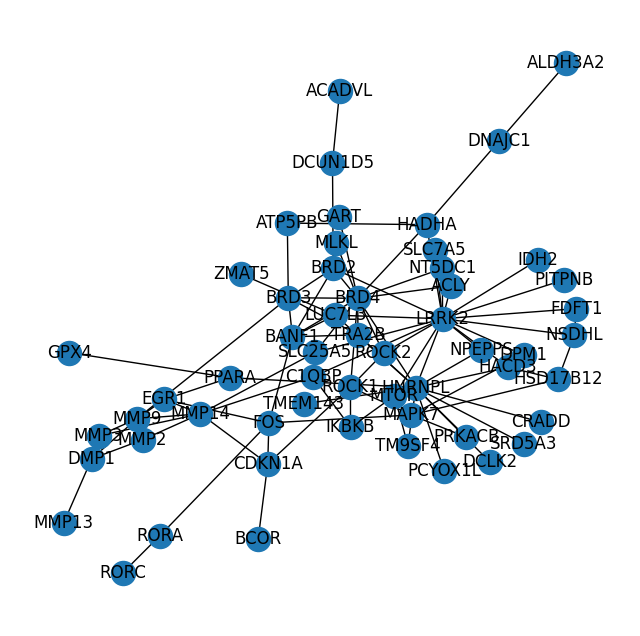

In [12]:
reload(c)
#Generate new network from string-db.
proteins_withCluster_jq1 = list(set(proteins_all_jq1+cluster_targets_jq1))

G_prel_clust, interactions_clust = tpp.retrievePreliminaryNetwork(proteins_withCluster_jq1, network_type="physical") 

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin' will be ignored
  node_collection = ax.scatter(


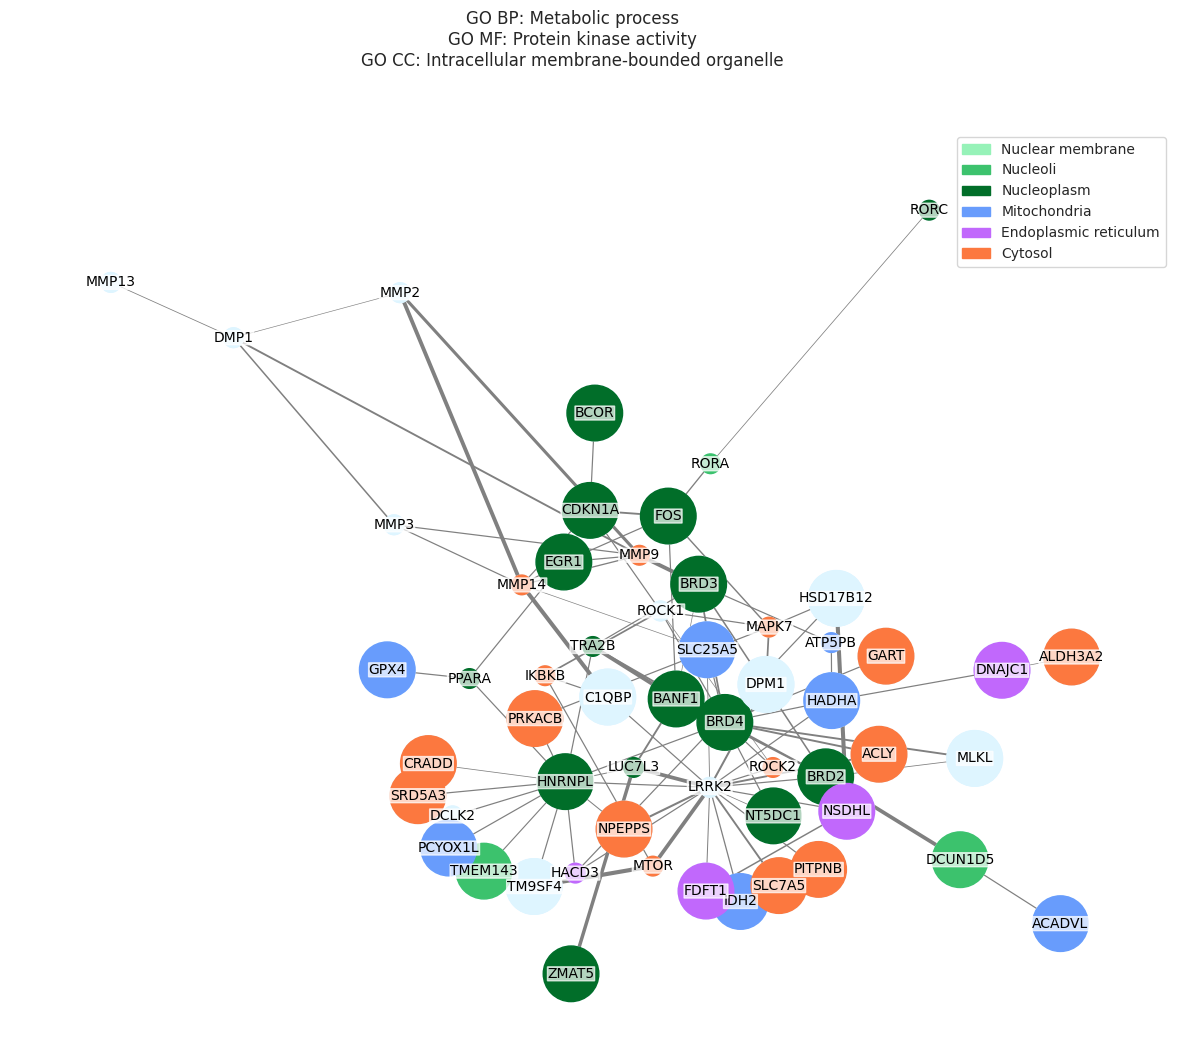

               0
LRRK2   0.367075
MMP14   0.095086
MMP9    0.087137
ROCK1   0.060109
PPARA   0.059511
LUC7L3  0.048833


In [14]:
#Plot new network from string-db.
reload(c)
between_c_clust = tpp.plotPPINetwork(G_prel_clust, 
                             interactions_clust, 
                             community=1, #Number of separate (not connected) networks seen in preliminary network figure above.
                             protein_list=proteins_all_jq1,
                             external_data=external_data,
                             #file_name='/share/data/analyses/camilla/cp_tpp/figures/figures_from_template/ppi_network_jq1_subcellular.svg',
                             label_method="subcellular",
                             #celline = "THP-1",
                             figure_size=(15,12)
                )
#Calculate betweenness centrality and keep only 5 best "additional" nodes. 
between_clust_df = tpp.findClusterProteinsToKeepInNetwork(between_c_clust, proteins_all_jq1, interactions_clust)
print(between_clust_df)

### Plot (final) PPI network with targets from TPP and only CP cluster targets with high BCS

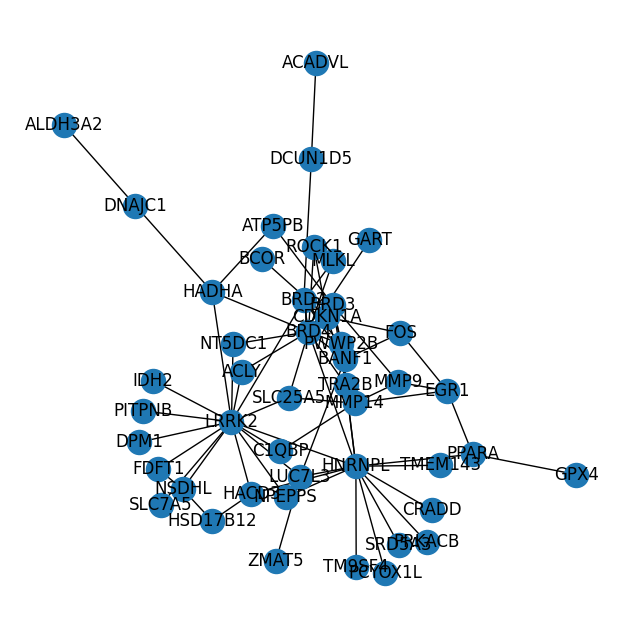

In [15]:
#Generate network with only best nodes
proteins_reducedCluster_jq1 = list(set(proteins_all_jq1+list(between_clust_df.index)))

G_prel_clust, interactions_clust = tpp.retrievePreliminaryNetwork(proteins_reducedCluster_jq1, network_type="physical") 

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin' will be ignored
  node_collection = ax.scatter(


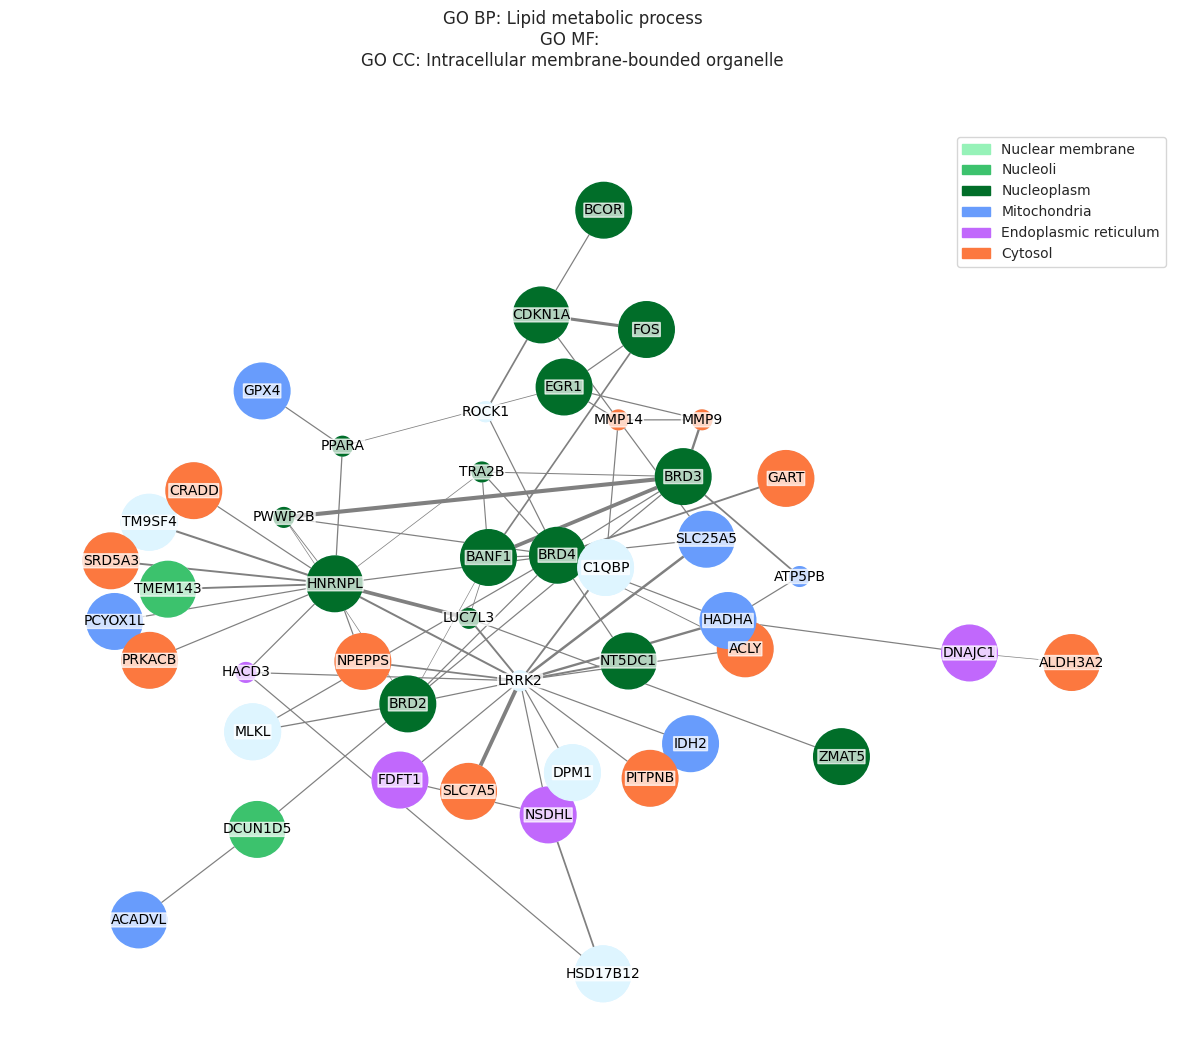

               0
LRRK2   0.408847
HNRNPL  0.372167
BRD4    0.250350
BRD2    0.129570
HADHA   0.110693
PPARA   0.066918
BANF1   0.060221
LUC7L3  0.058943
BRD3    0.055685
MMP14   0.052531


In [16]:
#Plot final network.
reload(tpp)
between_c_clust = tpp.plotPPINetwork(G_prel_clust, 
                             interactions_clust, 
                             community=1, #Number of separate (not connected) networks seen in preliminary network figure above.
                             protein_list=proteins_all_jq1,
                             external_data=external_data,
                             #file_name='/share/data/analyses/camilla/cp_tpp/figures/figures_from_template/ppi_network_jq1_subcellular_wc_physical_wCluster_v2.svg',
                             label_method="subcellular",
                             celline = "THP-1",
                             figure_size=(15,12)
                )
#Calculate betweenness centrality and keep only 5 best "additional" nodes. 
between_clust_df = tpp.findLargestBetweennessCentrality(between_c_clust, proteins_all_jq1, removeList=False, output_size=10)
print(between_clust_df)

/share/data/analyses/camilla/cp_tpp/code/cp_tpp_model/tpp/tpp.py:711: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pTPM_dict[i] = float(cluster_count_df[cluster_count_df["Target"] == i]["Count"]) #This gives warning now.


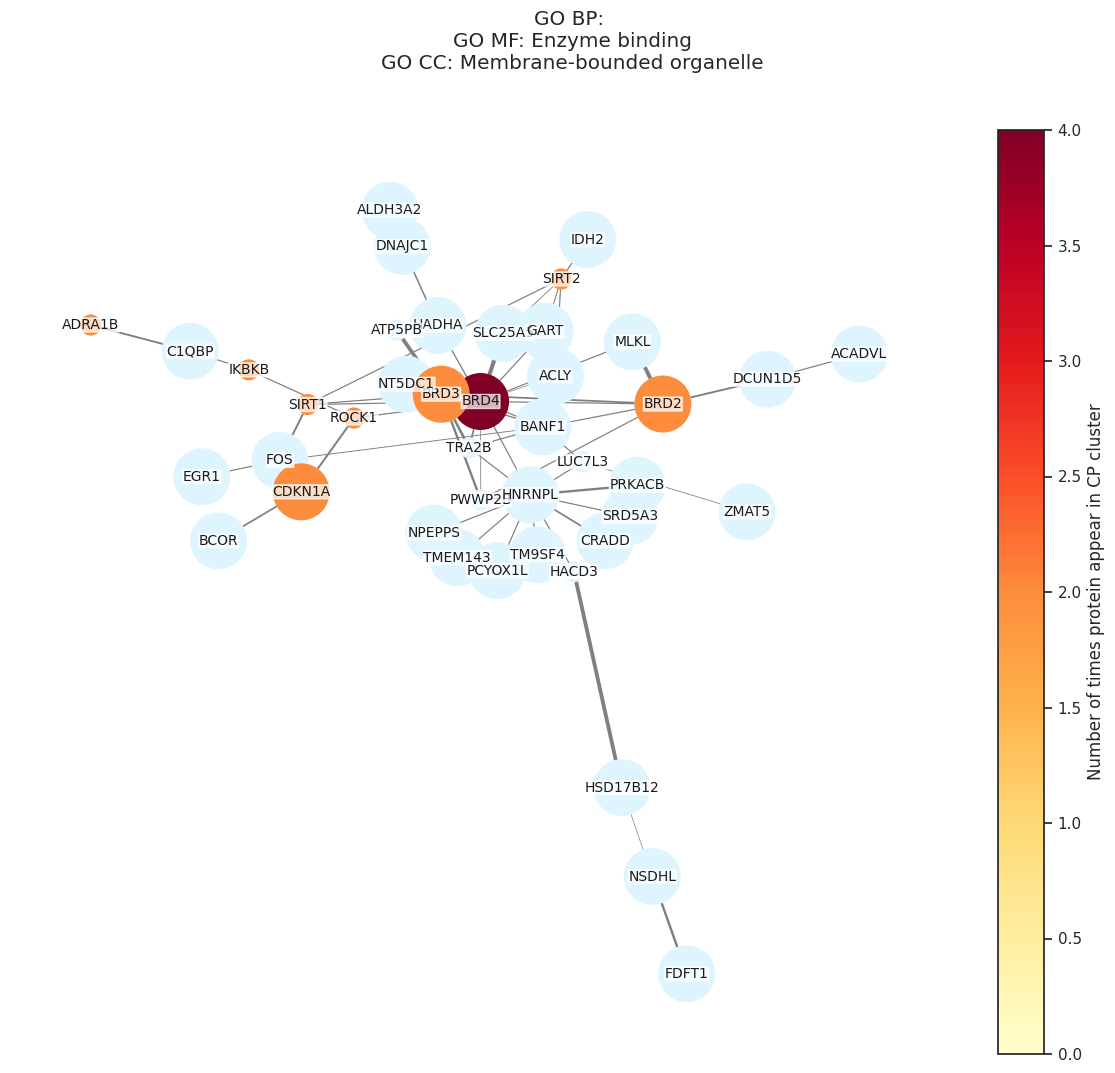

In [25]:
#Plot network colored by how many times a protein is present in cluster from cell painting data
reload(tpp)
cluster_protein_counts = tpp.countClusterProteins(dfGroupedByPlate1, annotations, cluster_highlight=cluster_compound_jq1, compound=compound, CompoundNames=CompoundNames)

between_c_clust = tpp.plotPPINetwork(G_prel_clust, 
                             interactions_clust, 
                             community=1, #Number of separate (not connected) networks seen in preliminary network figure above.
                             protein_list=proteins_all_jq1,
                             external_data=external_data,
                             #file_name='/share/data/analyses/camilla/cp_tpp/figures/figures_from_template/ppi_network_jq1_clusterCount_wc_physical_wCluster_v2.svg',
                             label_method="cluster count",
                             celline = "THP-1",
                             cluster_count_df = cluster_protein_counts,
                             figure_size=(15,12)
                )

### Pathway identification through community partitioning

Communities (graph clusters) can be identified using a number of different algorithms which tries to subdivide a network graph into subgraphs based on e.g. topology. NetworkX has support for community identification using several different algorithms (see [NetworkX -> Community](https://networkx.org/documentation/stable/reference/algorithms/community.html)). 

The nodes of the identified communities are then used as protein list inputs in pathway enrichment analysis (string db). Both GO and Reactome pathways are extracted and analyzed. 

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin' will be ignored
  node_collection = ax.scatter(


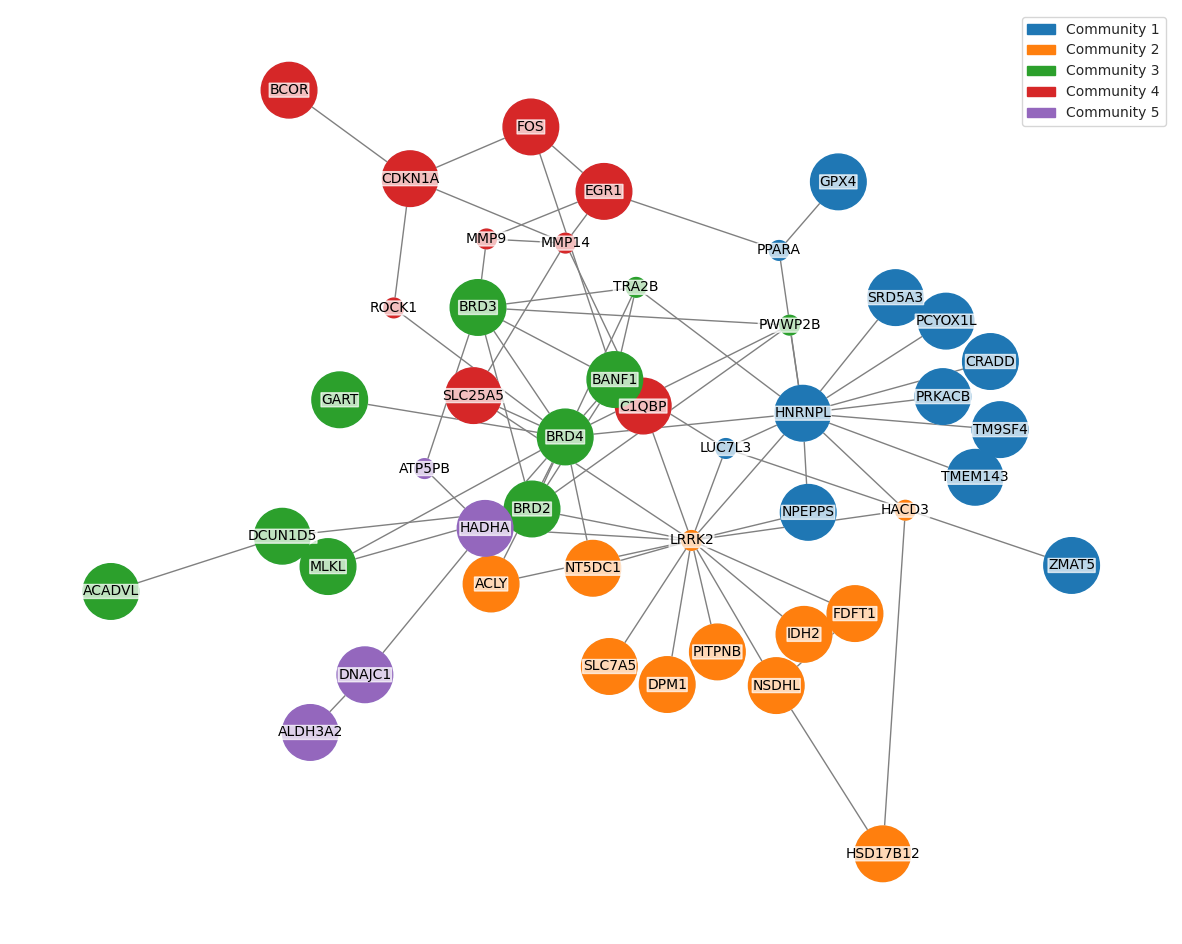

In [273]:
#Plot PPI network graph with communities as colors 
reload(tpp)
enrichment = tpp.plotPPINetworkCommunitites(G_prel_clust, 
                             interactions_clust, 
                             community=8, #Number of communities to subdivide graph into.
                             protein_list=proteins_all_jq1,
                             method = 'greedy_modularity_communities', # Method for identifying communitites. 
                             #file_name='/share/data/analyses/camilla/cp_tpp/figures/figures_from_template/ppi_network_jq1_communities_wc_physical_wCluster.svg',
                             figure_size=(15,12)
                )

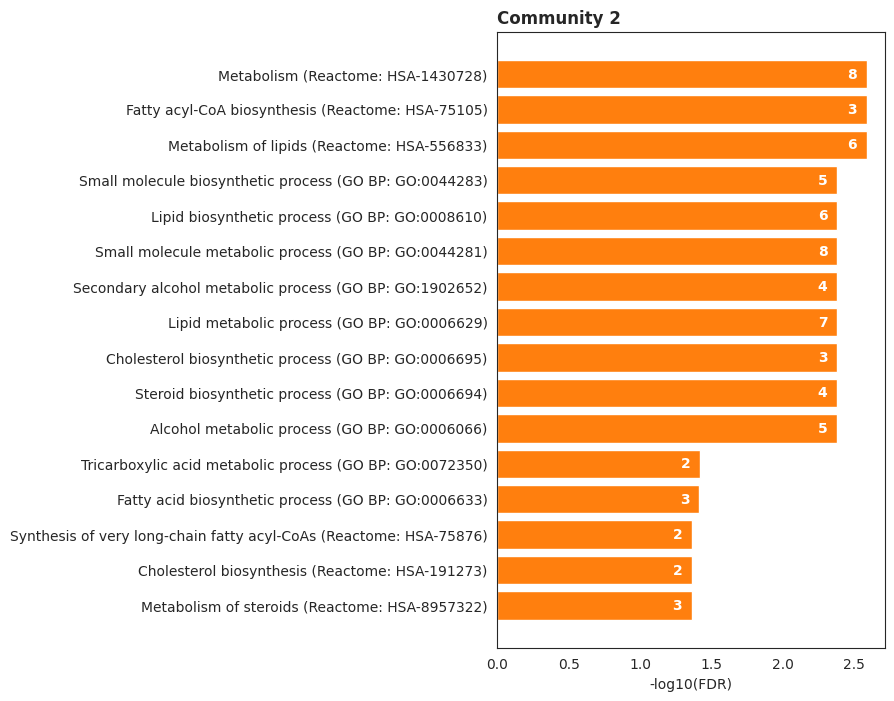

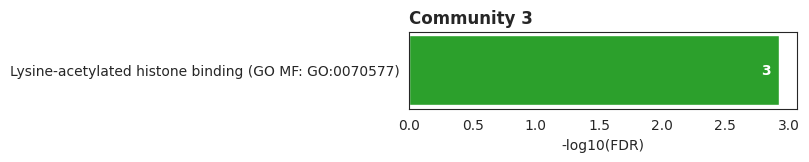

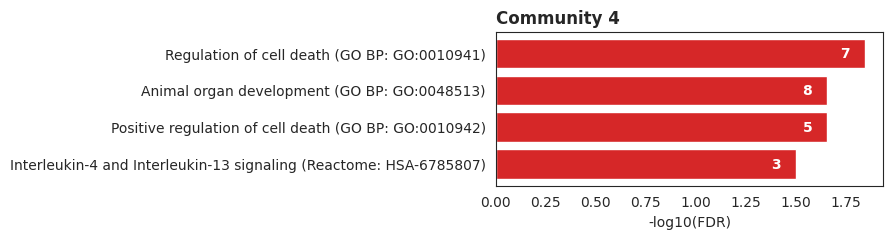

In [274]:
# Plots GO enrichment analysis for communitites. 
reload(tpp)
tpp.plotGOenrichmentCommunities(enrichment, 
                            #file_name = None
                           )

### Extract MoA information from CP cluster
The cluster in cell painting data can also be used to propose MoA. Here we extract and cound those detected MoAs (without including the MoA annotations from target compounds) and plot as histograms. 

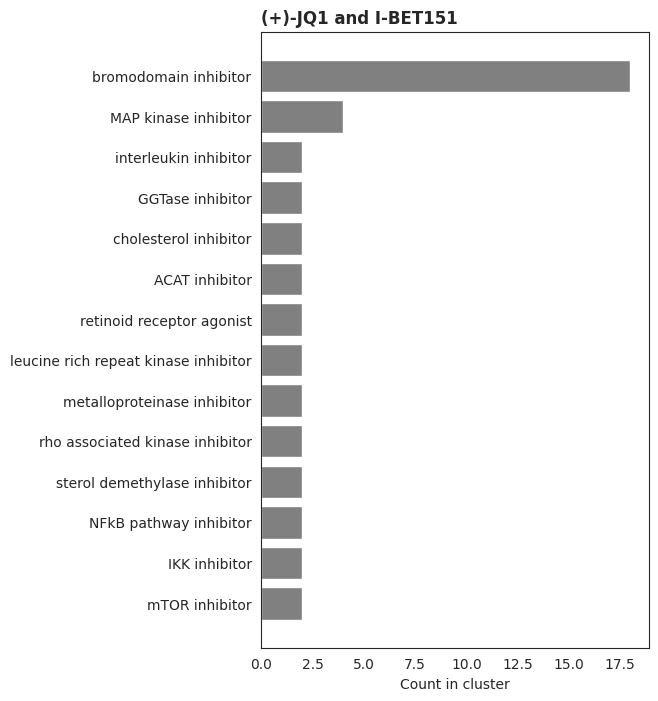

In [291]:
reload(tpp)
tpp.plotClusterMOA(dfGroupedByPlate1, 
                   annotations, 
                   clusters_compounds['(+)-JQ1'], 
                   ['(+)-JQ1', 'I-BET151'], 
                   CompoundNames,
                   file_name = None #Update here if you want to save figure to a file.
                  )

## Compare gene expression for targets between CP adn TPP

This code generates comparisons between protein expression in TPP cell line and CP cell line. 

1. Barchart with RNA expression from proteinatlas for known targets (and off-targets).

In [5]:
reload(tpp)
#Plot cell lines as barcharts
targets_to_compare = ['BRD4', 
                      'BRD3',
                      'BRD2'
                     ]
#Import external cell line expression data from Human Protein Atlas
expression_df = pd.read_csv("/share/data/analyses/camilla/cp_tpp/raw_data/rna_celline.tsv", sep="\t")

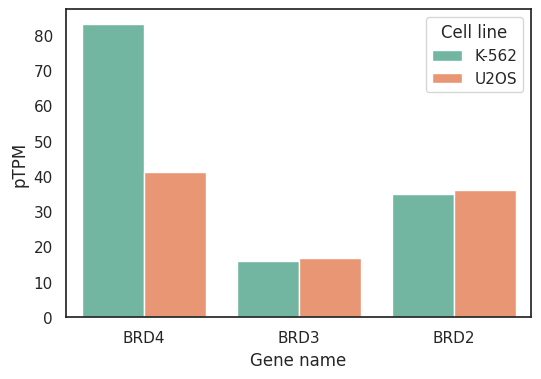

In [20]:
reload(tpp)
tpp.compareTargetRNAexpression_cellLines(expression_df, 
                                         targets = targets_to_compare, 
                                         cell_cp = 'U2OS', 
                                         cell_tpp = 'K-562',
                                         figsize=(6,4),
                                         file_name = None  #Update with path and file name here if you want to save the figure
                                        )